In [67]:
import psycopg2
from time import process_time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

/home/mcsalazart/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [56]:
times = []

In [57]:
# To connect to a Postgres DB

conn = psycopg2.connect(
    host="localhost",
    #port="your_port",
    database="chess",
    user="postgres",
    password="postgres"
)

cursor = conn.cursor()
conn.autocommit = True

# List to store execution times


In [58]:
# Read the SQL file
with open('queries.sql', 'r') as file:
    sql_content = file.read()

# Split the SQL content into separate queries
sql_queries = sql_content.split(';')

# Remove empty strings or whitespace-only queries
sql_queries = [query.strip() for query in sql_queries if query.strip()]

In [59]:
sql_filename = 'db_creation_and_load.sql'
with open(sql_filename, 'r') as file:
    sql_query = file.read()
cursor.execute(sql_query)

In [60]:
for query in sql_queries:
    print(query)
    time_start = process_time()
    cursor.execute(query)
    time_end = process_time()
    result=time_end - time_start
    print(result)
    times.append(result)
    

SELECT getBoard(notation, 3)
FROM games_100
WHERE game_site = 'Palma de Mallorca'
0.003352683000000134
SELECT getBoard(notation, 3)
FROM games_20
WHERE  game_site = 'Palma de Mallorca'
0.00017377799999973575
select getBoard(notation, 3)
FROM games_5
WHERE game_site = 'Palma de Mallorca'
0.00017727700000058633
select getBoard(notation, 3)
FROM games_1
WHERE  game_site = 'Palma de Mallorca'
0.00016765999999979186
SELECT getBoard(notation, 3)
FROM games_100
WHERE game_site = 'Palma de Mallorca'
0.00018169199999995556
SELECT getBoard(notation, 3)
FROM games_20
WHERE  game_site = 'Palma de Mallorca'
0.00017789300000004005
select getBoard(notation, 3)
FROM games_5
WHERE game_site = 'Palma de Mallorca'
0.00014453100000011432
select getBoard(notation, 3)
FROM games_1
WHERE  game_site = 'Palma de Mallorca'
0.00015221600000003832
--Query 2
--Return the games played in Leningrad and remove its opening move

SELECT getFirstMoves(notation, 1)
FROM games_100
WHERE game_site = 'Leningrad'
0.000228930

In [61]:
len(times)

24

In [62]:
# Read the SQL file
with open('queries_2.sql', 'r') as file:
    sql_content_2 = file.read()

# Split the SQL content into separate queries
sql_queries_2 = sql_content_2.split(';')

# Remove empty strings or whitespace-only queries
sql_queries_2 = [query.strip() for query in sql_queries_2 if query.strip()]

In [63]:
for query in sql_queries_2:
    print(query)
    time_start = process_time()
    cursor.execute(query)
    time_end = process_time()
    result=time_end - time_start
    print (result)
    times.append(result)

--Query 5
CREATE INDEX IF NOT EXISTS san_index_1 ON games_1(notation)
0.003344584999999789
CREATE INDEX IF NOT EXISTS san_index_5 ON games_5(notation)
0.0014007469999999245
CREATE INDEX IF NOT EXISTS san_index_20 ON games_20(notation)
0.0015610700000001643
CREATE INDEX IF NOT EXISTS san_index_100 ON games_100(notation)
0.000605817000000286
-- Consultas
SET enable_seqscan TO OFF
0.00013001399999978958
SELECT count(*) FROM games_100  WHERE hasOpening(notation, '1.e4 '::san)
0.00014644100000005267
SET enable_seqscan TO OFF
0.0001093030000003381
SELECT count(*) FROM games_20 WHERE hasOpening(notation, '1.e4 '::san)
0.00013292600000003318
SET enable_seqscan TO OFF
0.000145050000000424
SELECT count(*) FROM games_5 WHERE hasOpening(notation, '1.e4 '::san)
0.0013411529999993732
SET enable_seqscan TO OFF
0.0005398819999999915
SELECT count(*) FROM games_1 WHERE hasOpening(notation, '1.e4 '::san)
0.00021666199999970104
SET enable_seqscan TO OFF
0.00013722799999982271
SELECT count(*) FROM games_10

In [71]:
#It was ran 5 times to get the average as follow:

In [72]:
times = [0.00230075,
0.00029925,
0.00014625,
0.000154,
0.0001685,
0.0002975,
0.00015675,
0.000161,
0.00016025,
0.0001695,
0.000161,
0.000152,
0.001367,
0.00140275,
0.001372,
0.00141525,
0.00159725,
0.0015535,
0.00167725,
0.0017545,
0.0014235,
0.0014715,
0.0015415,
0.00146925,
0.001656,
0.00053775,
0.00110075,
0.0014325,
0.0004135,
0.00113875,
0.00046,
0.0011745,
0.00050325,
0.00131325,
0.000455,
0.001012,
0.000487,
0.001364,
0.00050425,
0.00135525,
0.0004615,
0.001057,
0.00046125,
0.00110325]

In [73]:
times_milli = [i * 1000 for i in times]

get_board = times_milli[4:8]
get_first_moves = times_milli[8:12]
has_opening_1 = times_milli[12:16]
has_opening_2 = times_milli[16:20]
has_board = times_milli[20:24]
has_opening_1_idx = [times_milli[29],times_milli[31],times_milli[33],times_milli[35]]
has_opening_2_idx = [times_milli[37],times_milli[39],times_milli[41],times_milli[43]]

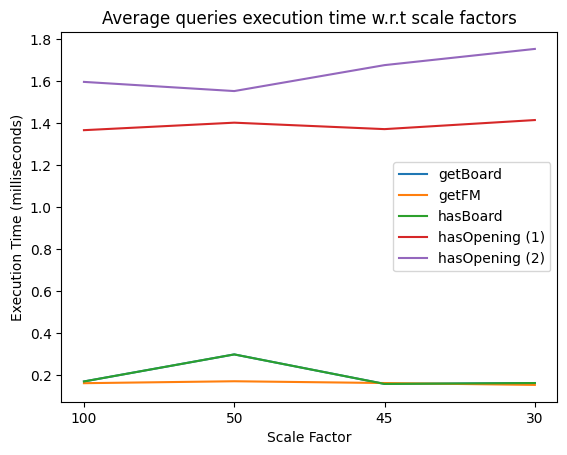

In [74]:
plt.plot(["100", "50", "45", "30"], get_board, label = "getBoard")
plt.plot(["100", "50", "45", "30"], get_first_moves, label = "getFM")
plt.plot(["100", "50", "45", "30"], get_board, label = "hasBoard")
plt.plot(["100", "50", "45", "30"], has_opening_1, label = "hasOpening (1)")
plt.plot(["100", "50", "45", "30"], has_opening_2, label = "hasOpening (2)")
plt.title("Average queries execution time w.r.t scale factors")
plt.xlabel("Scale Factor")
plt.ylabel("Execution Time (milliseconds)")
plt.legend()
plt.show()

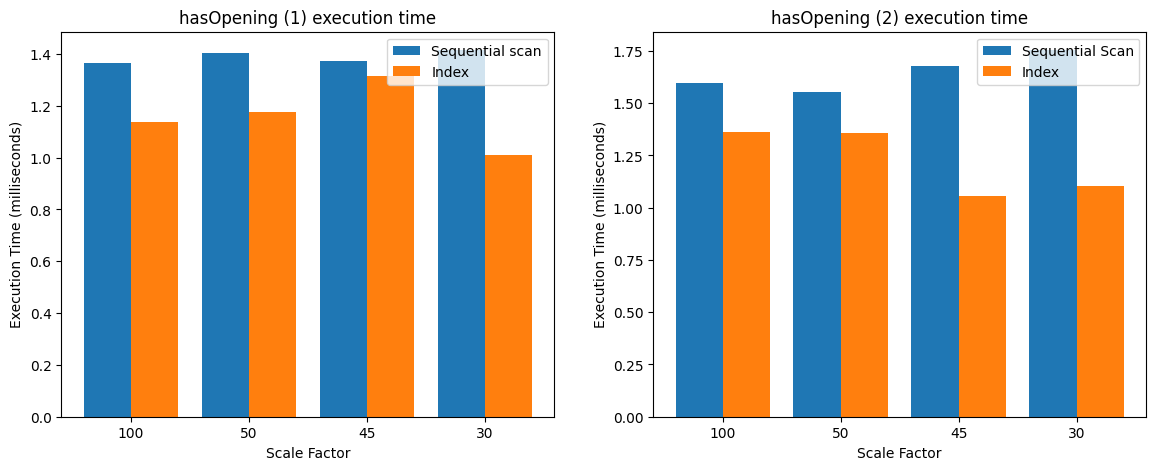

In [75]:
plt.figure(figsize=(14, 5))

plt.subplot(1,2,1)

x_values = np.arange(len(has_opening_1))

plt.bar(x_values - 0.2, has_opening_1, width=0.4, label='Sequential scan')
plt.bar(x_values + 0.2, has_opening_1_idx, width=0.4, label='Index')
plt.xticks(x_values, ["100", "50", "45", "30"])

plt.xlabel('Scale Factor')
plt.ylabel('Execution Time (milliseconds)')
plt.title('hasOpening (1) execution time')
plt.legend()

plt.subplot(1,2,2)

plt.bar(x_values - 0.2, has_opening_2, width=0.4, label='Sequential Scan')
plt.bar(x_values + 0.2, has_opening_2_idx, width=0.4, label='Index')
plt.xticks(x_values, ["100", "50", "45", "30"])

plt.xlabel('Scale Factor')
plt.ylabel('Execution Time (milliseconds)')
plt.title('hasOpening (2) execution time')
plt.legend()

plt.show()